# Pneumonia Detection using Traditional Machine Learning

Pneumonia adalah infeksi yang mengenai saluran pernapasan bagian bawah, yaitu paru-paru. Infeksi ini dapat disebabkan oleh berbagai agen penyebab, termasuk virus, bakteri, jamur, atau parasit. Pneumonia dapat terjadi pada siapa saja, tetapi lebih umum terjadi pada anak-anak kecil, orang dewasa dengan sistem kekebalan tubuh yang lemah, orang tua, serta individu dengan kondisi kesehatan yang sudah ada sebelumnya.

**Berikut Tipe Chest X-Ray Images (Pneumonia)**
![link text](https://d2jx2rerrg6sh3.cloudfront.net/image-handler/ts/20201218062244/ri/1318/picture/2020/12/Capture27.jpg)

**STUDI KASUS**

Implementasi Image Classification untuk 2 kelas penyakit Paru-paru yaitu Pneumonia Bacterial (PB) dan Pneumonia Viral (PV) menggunakan salah satu metode klasifikasi Machine Learning (ML) dengan tipe Supervised yaitu K-Nearest Neighbors (K-NN).

**Nama Anggota :**
1.   Hanin Nafi'ah (2101222083)
2.   Indra Ismail Nurramdhani (2101222074)
3.   Ivan Pratama Sudirman (2101222069)



## Tahap 1 : Import Library dan Dataset

In [1]:
import pandas as pd
import numpy as np
import random
import cv2
from imutils import paths

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from skimage.util import random_noise
from skimage.exposure import adjust_gamma

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import os
%matplotlib inline

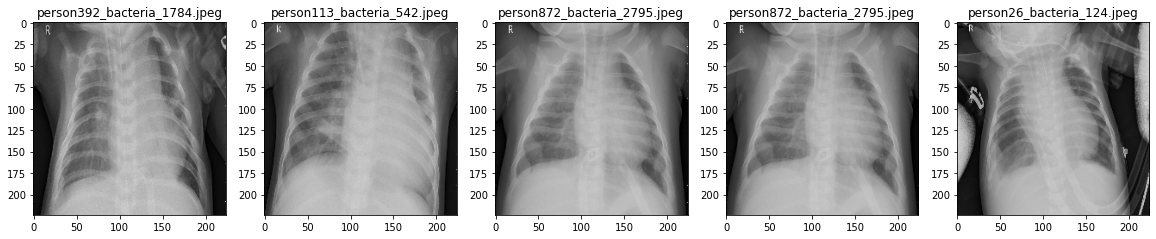

In [2]:
plt.figure(figsize=(20,20))
pb_folder=r'O:/Tubes PSO/Dataset/PB'
for i in range(5):
    file = random.choice(os.listdir(pb_folder))
    image_path= os.path.join(pb_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img, cmap='gray')

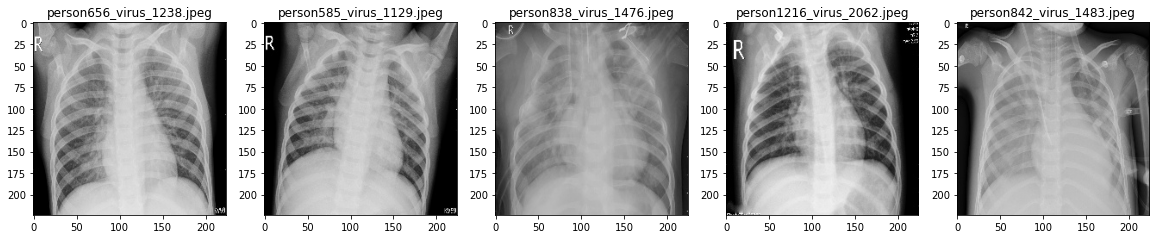

In [3]:
plt.figure(figsize=(20,20))
pv_folder=r'O:/Tubes PSO/Dataset/PV'
for i in range(5):
    file = random.choice(os.listdir(pv_folder))
    image_path= os.path.join(pv_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img, cmap='gray')

In [4]:
PB_images = len(os.listdir(pb_folder))
PV_images = len(os.listdir(pv_folder))

print(f"Jumlah Dataset X-ray Pneumonia Bacteria : {PB_images} gambar")
print(f"Jumlah Dataset X-ray Pneumonia Viral : {PV_images} gambar")

Jumlah Dataset X-ray Pneumonia Bacteria : 300 gambar
Jumlah Dataset X-ray Pneumonia Viral : 626 gambar


## Tahap 2 : Data Preprocessing

In [5]:
dataset_path = 'O:/Tubes PSO/Dataset'
imagePaths = list(paths.list_images(dataset_path))

In [6]:
data = []
labels = []

# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)
    image = random_noise(image)
    image = adjust_gamma(image, gamma=2,gain=1)
    image = cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA)
    # update the data and labels lists, respectively
    image_np = (image).flatten()
    data.append(image_np)
    labels.append(label)

# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data_train = np.array(data)
labels_train = np.array(labels)

In [7]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels_train_y = lb.fit_transform(labels_train)
labels_train_cat = to_categorical(labels_train_y)

# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

## Tahap 3 : Modeling K-Nearest Neighbor

In [8]:
# Building Model with k value
k = 8

knn_type1 = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
knn_type1.fit(X_train, y_train)
y_pred_type1 = knn_type1.predict(X_test)
acc_score_1 = accuracy_score(y_test,y_pred_type1)

knn_type2 = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='uniform')
knn_type2.fit(X_train, y_train)
y_pred_type2 = knn_type2.predict(X_test)
acc_score_2 = accuracy_score(y_test,y_pred_type2)

knn_type3 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', weights='distance')
knn_type3.fit(X_train, y_train)
y_pred_type3 = knn_type3.predict(X_test)
acc_score_3 = accuracy_score(y_test,y_pred_type3)

knn_type4 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', weights='uniform')
knn_type4.fit(X_train, y_train)
y_pred_type4 = knn_type4.predict(X_test)
acc_score_4 = accuracy_score(y_test,y_pred_type4)

knn_type5 = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance')
knn_type5.fit(X_train, y_train)
y_pred_type5 = knn_type5.predict(X_test)
acc_score_5 = accuracy_score(y_test,y_pred_type5)

knn_type6 = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='uniform')
knn_type6.fit(X_train, y_train)
y_pred_type6 = knn_type6.predict(X_test)
acc_score_6 = accuracy_score(y_test,y_pred_type6)

In [9]:
models = pd.DataFrame({
    'Model': ['K-NN Type 1', 'K-NN Type 2', 'K-NN Type 3','K-NN Type 4', 'K-NN Type 5', 'K-NN Type 6'],
    'Metric' : ['Euclidean', 'Euclidean', 'Minkowski', 'Minkowski', 'Manhattan', 'Manhattan'],
    'Weights' : ['Distance','Uniform','Distance','Uniform','Distance','Uniform'],
    'Accuracy Score': [acc_score_1,acc_score_2,acc_score_3,acc_score_4,acc_score_5,acc_score_6]})
models

,Model,Metric,Weights,Accuracy Score
0,K-NN Type 1,Euclidean,Distance,0.720430
1,K-NN Type 2,Euclidean,Uniform,0.741935
2,K-NN Type 3,Minkowski,Distance,0.720430
3,K-NN Type 4,Minkowski,Uniform,0.741935
4,K-NN Type 5,Manhattan,Distance,0.741935
5,K-NN Type 6,Manhattan,Uniform,0.779570


## Tahap 4 : Model Prediction

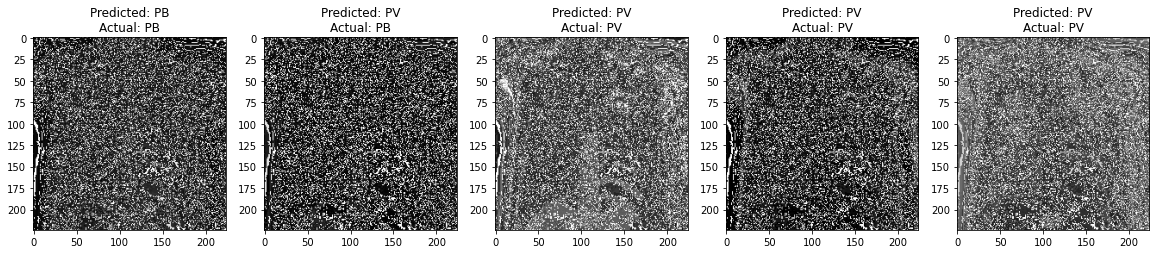

In [10]:
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(X_test)
    ax=plt.subplot(1,5,i+1)
    plt.imshow(file[img])
    # plt.imshow(mpimg.imread(file))
    plt.title('Predicted: ' + str((y_pred_type6[i])) + '\n' + 'Actual: ' + str((y_test[i])))

## Tahap 5 : Model Evaluation

In [11]:
#function to plot the confusion matrix for each model
def plot_cm(predictions, y_test, title):
  labels = ['PB', 'PV']
  cm = confusion_matrix(y_test, predictions)
  cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
  plt.figure(figsize = (4,4))
  plt.title(title)
  sns.heatmap(cm, linecolor = 'white' , linewidth = 1 , annot = True, fmt='', xticklabels = labels, yticklabels = labels)
  plt.xlabel('Predicted label')
  plt.ylabel('Actual label')
  plt.show()

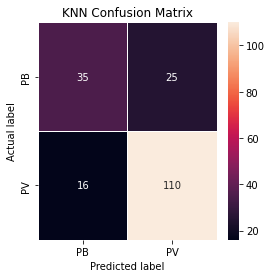

In [13]:
#plot confusion matrix for each model
plot_cm(y_pred_type6, y_test, 'KNN Confusion Matrix')

In [14]:
#KNN classification report
print(classification_report(y_test, y_pred_type6, target_names= ['PB (0)', 'PV (1)']))

              precision    recall  f1-score   support

      PB (0)       0.69      0.58      0.63        60
      PV (1)       0.81      0.87      0.84       126

    accuracy                           0.78       186
   macro avg       0.75      0.73      0.74       186
weighted avg       0.77      0.78      0.77       186



In [15]:
#function to visualise the best K for minimum Error
def plot_E(X_train, y_train, X_test, y_test):
  error1= []
  error2= []
  for k in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))

  plt.plot(range(1,20),error1,label="train")
  plt.plot(range(1,20),error2,label="test")
  plt.xlabel('K Value')
  plt.ylabel('Error')
  plt.legend()

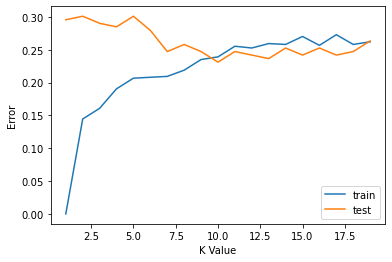

In [16]:
plot_E(X_train, y_train, X_test, y_test)

In [17]:
#function to visualise the best K for maximize Accuracy
def plot_A(X_train, y_train, X_test, y_test):
  acc1= []
  acc2= []
  for k in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    acc1.append(knn.score(X_train,y_train))
    acc2.append(knn.score(X_test,y_test))

  plt.plot(range(1,20),acc1,label="train")
  plt.plot(range(1,20),acc2,label="test")
  plt.xlabel('K Value')
  plt.ylabel('Accuracy')
  plt.legend()

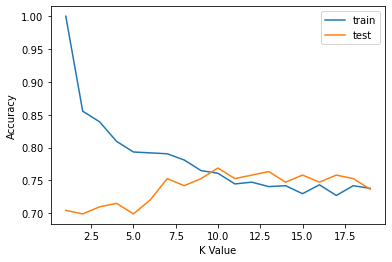

In [18]:
plot_A(X_train, y_train, X_test, y_test)